Датасет с кагла Heart disease

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Импортируем датасет

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
df = pd.read_csv('dataset/heart_disease_data.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Тепловая карта  для корреляции данных

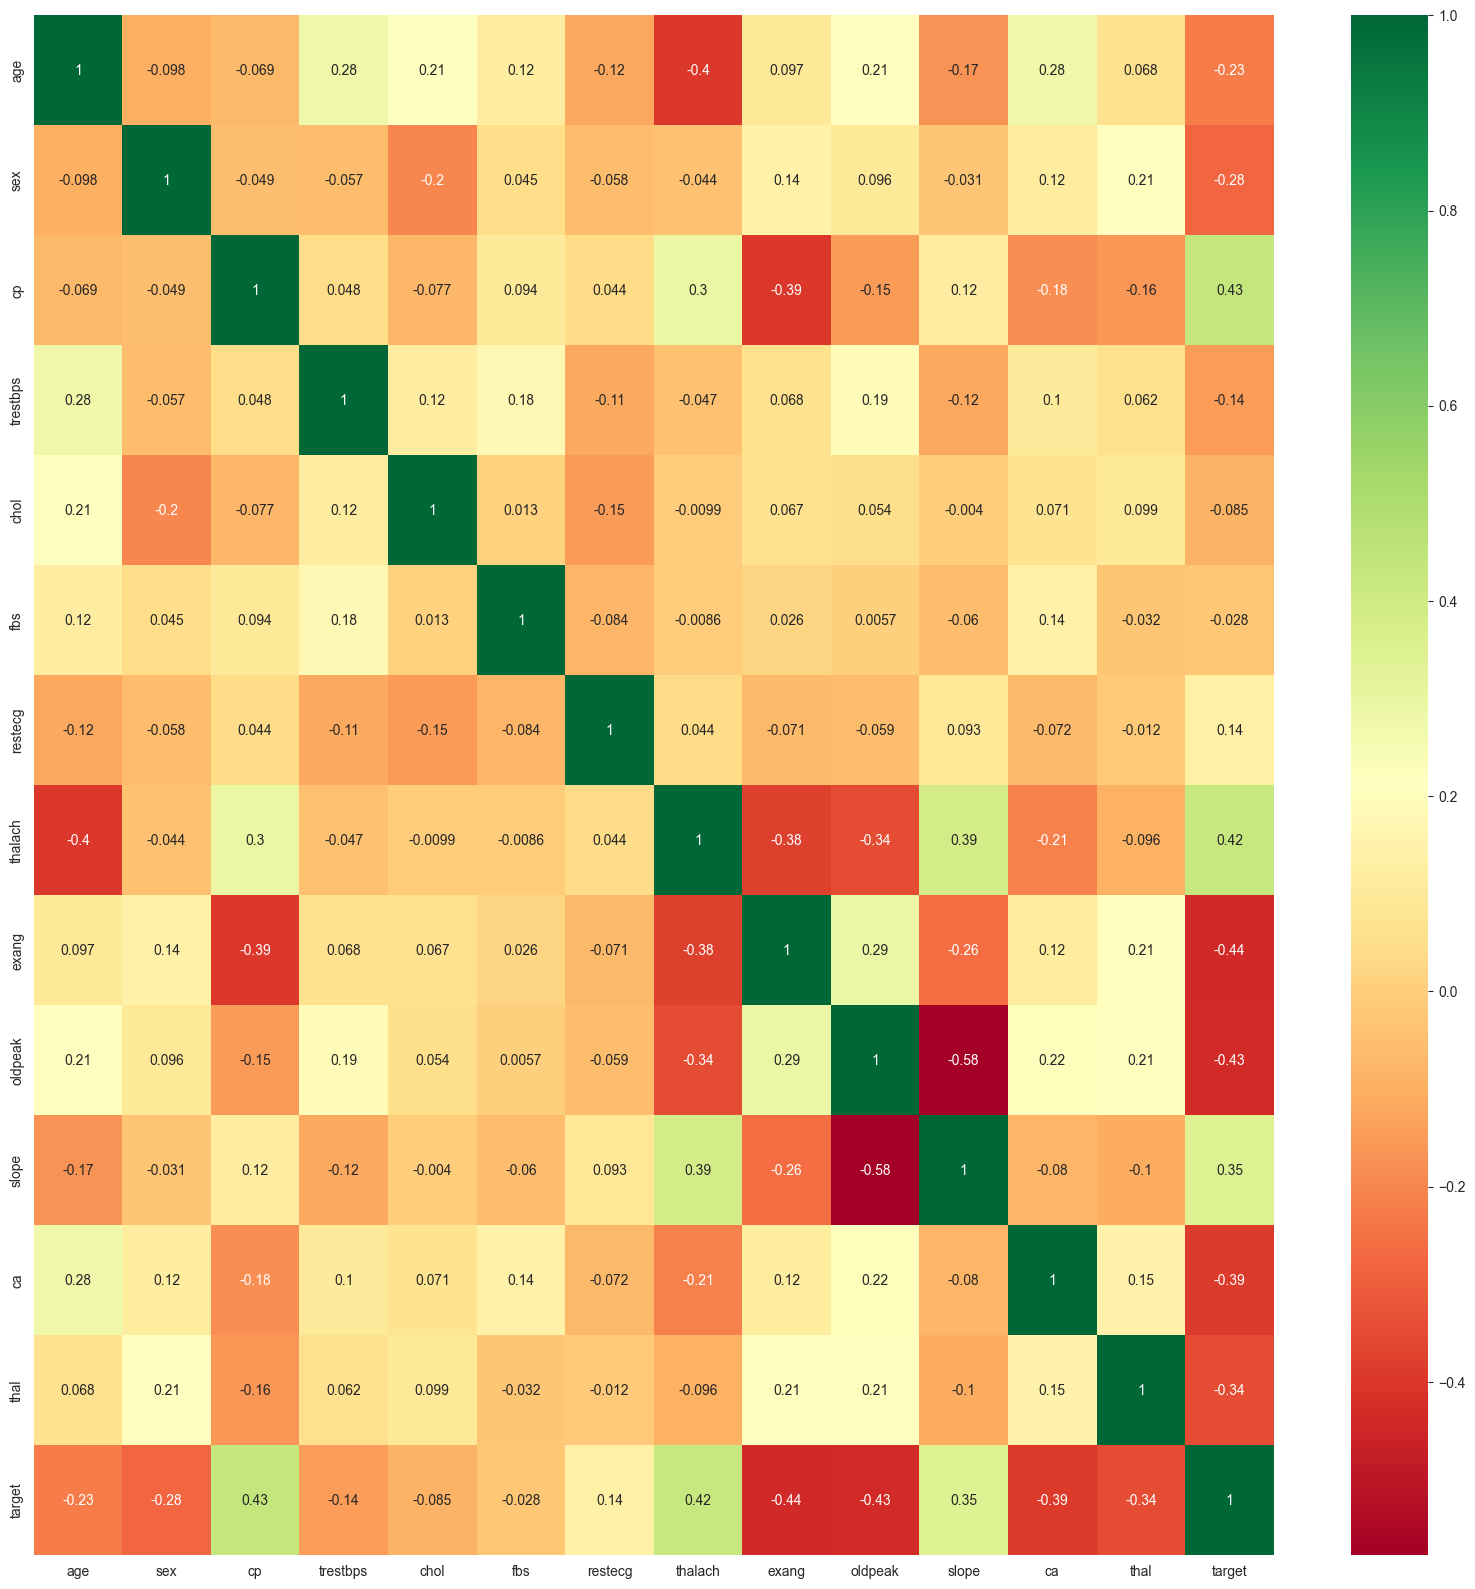

In [71]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Обрабатываем датасет определяем признаки и классифицируем данные те датасет обрабатывается с помощью кодирования категориальных признаков (1 хот енкодинг)

In [72]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [74]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [75]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [76]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [77]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [78]:
score.mean()

0.8448387096774195

## Метод случайного леса используется для классификации и регрессии для улучшения качества и устойчивости модели.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [81]:
score.mean()

0.8149462365591399

In [82]:
# Создание тестовых данных
test_data = pd.DataFrame({
    'age': [58, 54, 56, 58, 51],
    'sex': [1, 1, 1, 0, 1],
    'cp': [3, 4, 4, 4, 4],
    'trestbps': [130, 110, 125, 100, 130],
    'chol': [246, 206, 249, 234, 305],
    'fbs': [1, 0, 1, 0, 0],
    'restecg': [2, 2, 2, 0, 0],
    'thalach': [173, 108, 144, 156, 142],
    'exang': [0, 1, 1, 0, 1],
    'oldpeak': [0.0, 0.0, 1.2, 0.1, 1.2],
    'slope': [1, 2, 2, 1, 2],
    'ca': [3.0, 3.0, 1.0, 7.0, 0.0],
    'thal': [3.0, 3.0, 3.0, 2.0, 7.0]
})

In [83]:
knn_classifier.fit(X, y)

test_data = pd.DataFrame({
    'age': [58.0, 54.0, 56.0, 58.0, 51.0],  # Примеры значений для числовых признаков
    'trestbps': [145, 130, 120, 130, 145],
    'chol': [1, 0, 1, 0, 1],
    'thalach': [150, 187, 172, 178, 165],
    'oldpeak': [2.3, 3.6, 3.5, 0.8, 1.3],
    'sex_0': [0, 0, 0, 1, 0],  # Примеры значений для бинарных категориальных признаков (пол)
    'sex_1': [1, 1, 1, 0, 1],
    'cp_0': [0, 0, 0, 0, 0],  # Примеры значений для категориальных признаков (тип боли в груди)
    'cp_1': [1, 0, 0, 0, 0],
    'cp_2': [0, 1, 1, 1, 1],
    'cp_3': [0, 0, 0, 0, 0],
    'fbs_0': [0, 1, 0, 1, 1],  # Примеры значений для бинарных категориальных признаков (уровень сахара в крови)
    'fbs_1': [1, 0, 1, 0, 0],
    'restecg_0': [1, 0, 1, 0, 1],  # Примеры значений для множественных категориальных признаков (результаты ЭКГ)
    'restecg_1': [0, 1, 0, 1, 0],
    'restecg_2': [0, 0, 0, 0, 0],
    'exang_0': [0, 1, 1, 0, 1],  # Примеры значений для бинарных категориальных признаков (наличие стенокардии)
    'exang_1': [1, 0, 0, 1, 0],
    'slope_0': [0, 0, 0, 0, 0],  # Примеры значений для множественных категориальных признаков (наклон сегмента ST)
    'slope_1': [1, 0, 1, 0, 1],
    'slope_2': [0, 1, 0, 1, 0],
    'ca_0': [0, 0, 0, 0, 0],  # Примеры значений для множественных категориальных признаков (количество крупных сосудов)
    'ca_1': [1, 1, 1, 0, 0],
    'ca_2': [0, 0, 0, 0, 0],
    'ca_3': [0, 0, 0, 1, 0],
    'ca_4': [0, 0, 0, 0, 1],
    'thal_0': [0, 0, 0, 0, 0],  # Примеры значений для множественных категориальных признаков (результаты талассемии)
    'thal_1': [1, 0, 0, 0, 0],
    'thal_2': [0, 1, 0, 1, 0],
    'thal_3': [0, 0, 1, 0, 1],
})

print(knn_classifier.predict(test_data))


[1 1 1 1 1]
